In [3]:
# First of all i import all the packages 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [14]:
# first let me read the csv file 
df = pd.read_csv(r'C:\Users\up\Downloads\amazon.csv', encoding='latin1',parse_dates=['date'])
df

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01
...,...,...,...,...,...
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01


In [12]:
# First of all let me check the top 5 columns
df.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [16]:
# Now i check the last 5 rows of the dataset
df.tail()

,year,state,month,number,date
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01
6453,2016,Tocantins,Dezembro,119.0,2016-01-01


In [15]:
# Then i check the Datatypes
df.dtypes

year               int64
state             object
month             object
number           float64
date      datetime64[ns]
dtype: object

In [21]:
# Here im finding out the shape of the dataset how many rows and columns 
print("Number of Rows",data.shape[0])
print("Number of Columns",data.shape[1])

Number of Rows 6454
Number of Columns 5


In [22]:
# Here im getting information About Our Dataset Like Total Number Rows, Total Number of Columns, 
# Datatypes of Each Column And Memory Requirement

data.info 

<bound method DataFrame.info of       year      state     month  number        date
0     1998       Acre   Janeiro     0.0  1998-01-01
1     1999       Acre   Janeiro     0.0  1999-01-01
2     2000       Acre   Janeiro     0.0  2000-01-01
3     2001       Acre   Janeiro     0.0  2001-01-01
4     2002       Acre   Janeiro     0.0  2002-01-01
...    ...        ...       ...     ...         ...
6449  2012  Tocantins  Dezembro   128.0  2012-01-01
6450  2013  Tocantins  Dezembro    85.0  2013-01-01
6451  2014  Tocantins  Dezembro   223.0  2014-01-01
6452  2015  Tocantins  Dezembro   373.0  2015-01-01
6453  2016  Tocantins  Dezembro   119.0  2016-01-01

[6454 rows x 5 columns]>

In [24]:
# Check For Duplicate Data and Drop Them
dup_data = data.duplicated().any()
print("Are there any duplicated values in the data",dup_data)

Are there any duplicated values in the data True


In [26]:
data = data.drop_duplicates()
data.shape

(6422, 5)

In [27]:
6454-6422

32

In [28]:
# Here Check if there are  Null Values In The Dataset
data.isnull().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

In [29]:
# Here im Getting Overall Statistics About The Dataframe

data.describe(include='all',datetime_is_numeric=True)

,year,state,month,number,date
count,6422.000000,6422,6422,6422.000000,6422
unique,NaN,23,12,NaN,20
top,NaN,Rio,Agosto,NaN,2015-01-01
freq,NaN,697,540,NaN,324
mean,2007.490969,NaN,NaN,108.815178,NaN
std,5.731806,NaN,NaN,191.142482,NaN
min,1998.000000,NaN,NaN,0.000000,NaN
25%,2003.000000,NaN,NaN,3.000000,NaN
50%,2007.000000,NaN,NaN,24.497000,NaN
75%,2012.000000,NaN,NaN,114.000000,NaN


In [40]:
# Here im Renaming the Month Names To English 
data.head()
data['month_new']=data['month'].map({'Janeiro':'jan',
                                    'Fevereiro':'feb',
                                    'Março':'march',
                                    'Abril':'april',
                                    'Maio':'may',
                                    'Junho':'jun',
                                    'Julho':'july',
                                    'Agosto':'august',
                                    'Setembro':'sep',
                                    'Outubro':'oct',
                                    'Novembro':'nov',
                                    'Dezembro':'dec'})
data.head()

,year,state,month,number,date,month_new
0,1998,Acre,Janeiro,0.0,1998-01-01,jan
1,1999,Acre,Janeiro,0.0,1999-01-01,jan
2,2000,Acre,Janeiro,0.0,2000-01-01,jan
3,2001,Acre,Janeiro,0.0,2001-01-01,jan
4,2002,Acre,Janeiro,0.0,2002-01-01,jan


In [41]:
 # Here im finding out the totaal number of fires
data.shape

(6422, 6)

In [42]:
# Here im finding out which month had the most fires
data.columns 

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [80]:
data1= data.groupby('month_new')['number'].sum().reset_index()
data1 = data1.sort_values(by='number', ascending=False)
data1

,month_new,number
5,july,92319.113
10,oct,88681.579
1,august,88050.435
9,nov,85508.054
11,sep,58578.305
2,dec,57535.480
6,jun,55997.675
4,jan,47681.844
8,may,34725.363
3,feb,30839.050


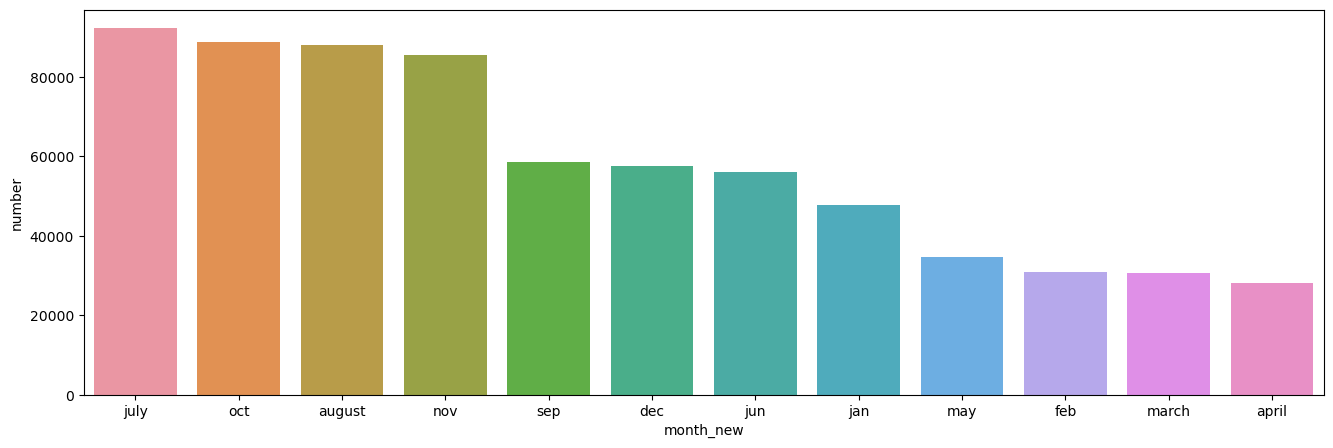

In [81]:
plt.figure(figsize=(16,5))
sns.barplot(x="month_new",y="number",data=data1)
data1 = data1.sort_values(by='number', ascending=False)

In [82]:
# Here im seeing in  Which Year the Maximum Number of Forest Fires Were Reported? 
data2= data.groupby('year')['number'].sum().reset_index()
data2 = data2.sort_values(by='number', ascending=False)
data2

,year,number
5,2003,42760.674
18,2016,42212.229
17,2015,41208.292
14,2012,40084.860
16,2014,39621.183
11,2009,39116.178
6,2004,38450.163
4,2002,37390.600
12,2010,37037.449
19,2017,36619.624


<AxesSubplot:xlabel='year', ylabel='number'>

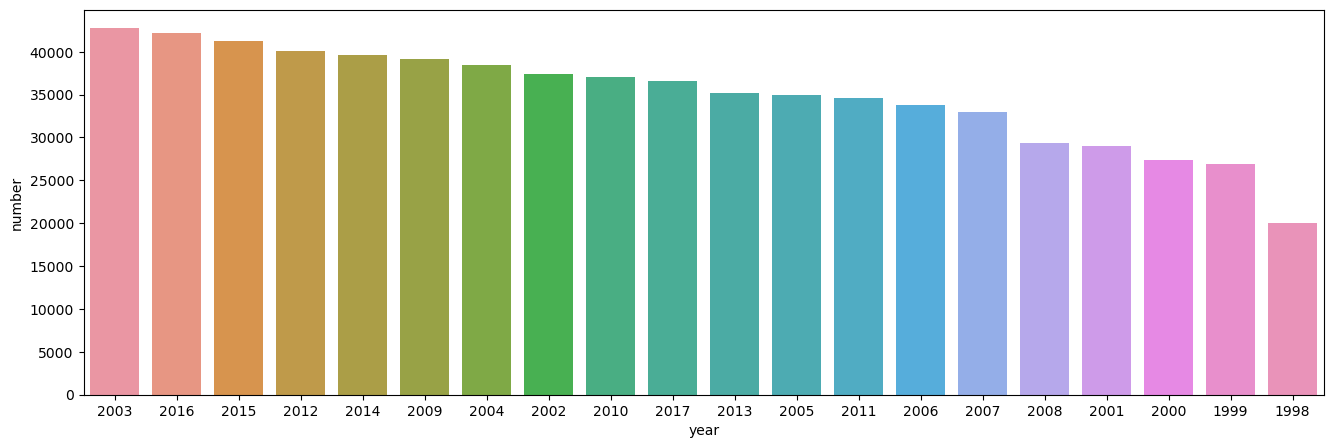

In [87]:
plt.figure(figsize=(16,5))
sns.barplot(x="year", y="number", data=data2, order=data2.sort_values('number', ascending=False)['year'])


In [47]:
#  In Which State Maximum Number of Forest Fires Were Reported?
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [88]:
data3= data.groupby('state')['number'].sum().reset_index()
data3 = data3.sort_values(by='number', ascending=False)

data3

,state,number
10,Mato Grosso,96246.028
12,Paraiba,52426.918
20,Sao Paulo,51121.198
16,Rio,45094.865
4,Bahia,44746.226
15,Piau,37803.747
8,Goias,37695.520
11,Minas Gerais,37475.258
22,Tocantins,33707.885
3,Amazonas,30650.129


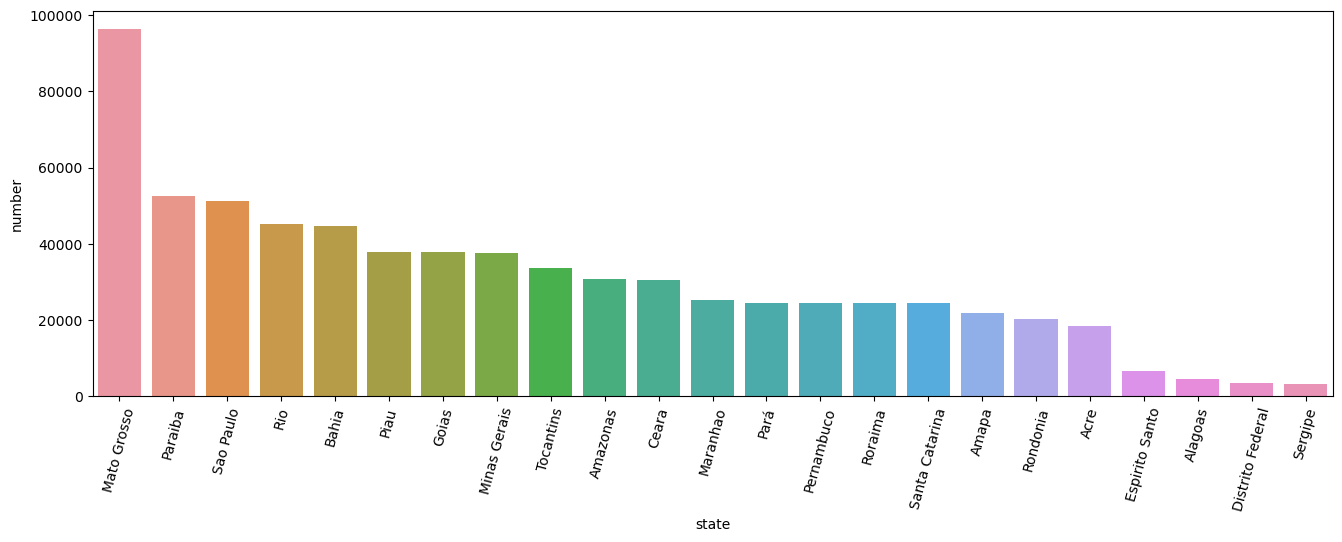

In [89]:
plt.figure(figsize=(16,5))
data3_sorted = data3.sort_values(by='number', ascending=False)
sns.barplot(x="state", y="number", data=data3_sorted)
plt.xticks(rotation=75)
plt.show()


In [50]:
# Find Total Number of Fires Were Reported In Amazonas
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [51]:
data[data['state']=="Amazonas"]['number'].sum() 

30650.129

In [52]:
# Display Number of Fires Were Reported In Amazonas (Year-Wise)
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [92]:
data4 = data[data['state'] == "Amazonas"]
data5 = data4.groupby('year')['number'].sum().reset_index()
data5 = data5.sort_values(by='number', ascending=False)
data5

,year,number
4,2002,2852.000
10,2008,2717.000
16,2014,2385.909
12,2010,2324.508
6,2004,2298.207
18,2016,2060.972
7,2005,1657.128
13,2011,1652.538
5,2003,1524.268
11,2009,1320.601


<AxesSubplot:xlabel='year', ylabel='number'>

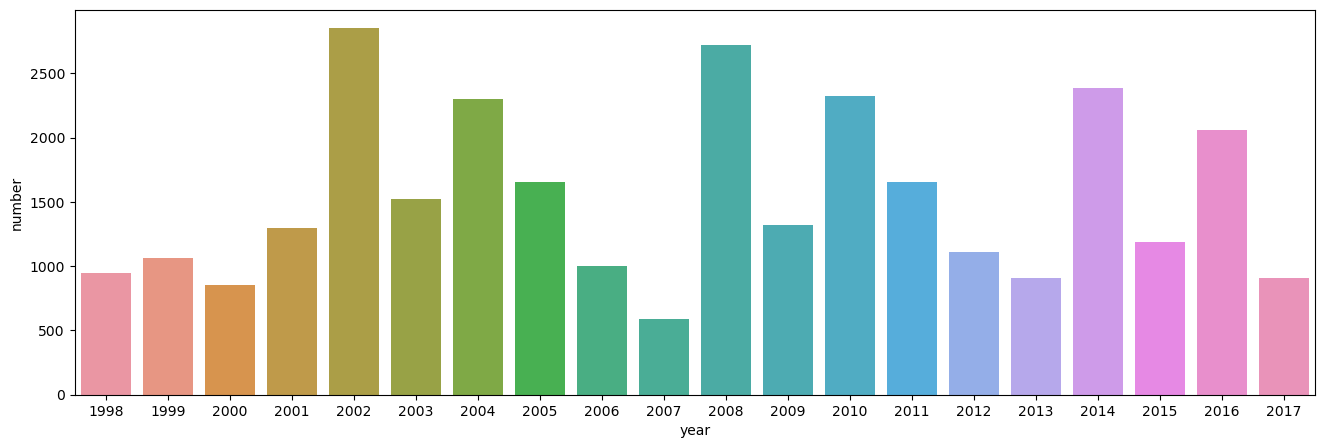

In [93]:
plt.figure(figsize=(16,5))
data5_sorted = data5.sort_values(by='number', ascending=False)
sns.barplot(x="year", y="number", data=data5_sorted)


In [55]:
#  Here i Display the Number of Fires that  Were Reported In the  Amazonas (Day-Wise)
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [56]:
data6 = data[data['state']=="Amazonas"]

In [94]:
day = data6.groupby(data6['date'].dt.dayofweek).sum()['number']

import calendar

day.index = [calendar.day_name[x] for x in range(0, 7)]

day = day.reset_index()
day = day.sort_values(by='number', ascending=False)




In [95]:
day

,index,number
1,Tuesday,6474.217
3,Thursday,5754.802
4,Friday,5446.480
5,Saturday,4162.666
2,Wednesday,3910.177
6,Sunday,3015.186
0,Monday,1886.601


<AxesSubplot:xlabel='index', ylabel='number'>

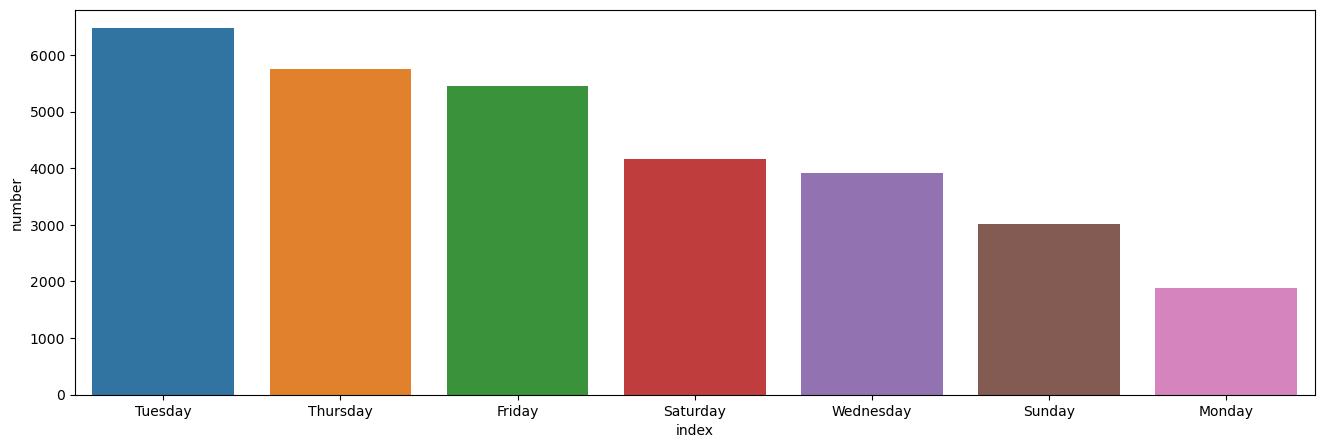

In [96]:
day_sorted = day.sort_values(by='number', ascending=False)

plt.figure(figsize=(16,5))
sns.barplot(x="index", y="number", data=day_sorted)


In [61]:
# Here im Finding out the  Total Number of Fires 
# That Were Reported In 2015 And Visualize Data Based on Each ‘Month’
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [98]:
fire = data[data['year'] == 2015].groupby('month_new')['number'].sum().reset_index()
fire = fire.sort_values(by='number', ascending=False)
fire 

,month_new,number
4,jan,4635.000
10,oct,4499.525
5,july,4364.392
1,august,4363.125
2,dec,4088.522
9,nov,4034.518
6,jun,3260.552
0,april,2573.000
11,sep,2494.658
8,may,2384.000


<AxesSubplot:xlabel='month_new', ylabel='number'>

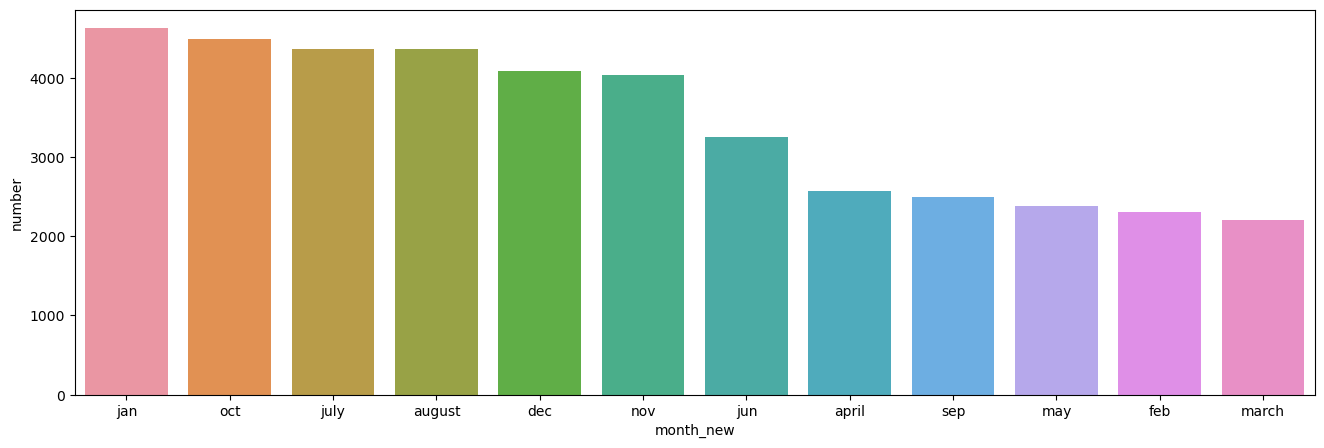

In [99]:
fire_sorted = fire.sort_values(by='number', ascending=False)

plt.figure(figsize=(16,5))
sns.barplot(x="month_new", y="number", data=fire_sorted)


In [65]:
# Here im  Finding the  Average Number of Fires that Were Reported From Highest to Lowest (State-Wise)
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [67]:
data8= data.groupby('state')['number'].mean().sort_values(ascending=False).reset_index()
data8

,state,number
0,Sao Paulo,213.896226
1,Mato Grosso,203.479975
2,Bahia,187.222703
3,Piau,158.174674
4,Goias,157.721841
5,Minas Gerais,156.800243
6,Tocantins,141.037176
7,Amazonas,128.243218
8,Ceara,127.314071
9,Paraiba,111.073979


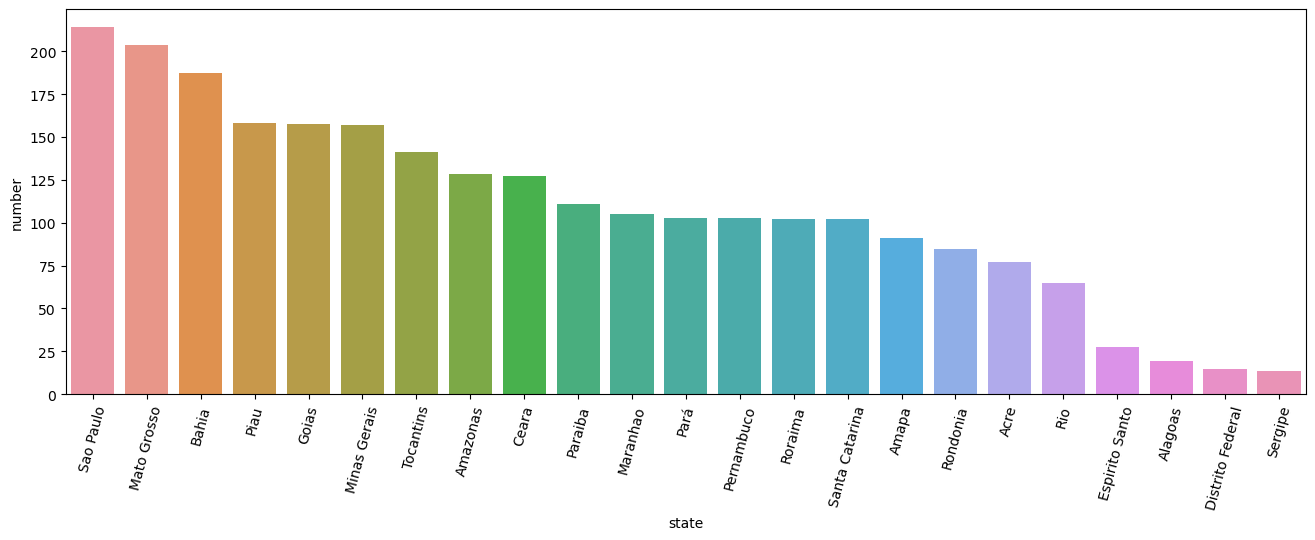

In [68]:
plt.figure(figsize=(16,5))
sns.barplot(x="state",y="number",data=data8)
plt.xticks(rotation=75)
plt.show()

In [70]:
# Here im  Finding out The State Names Where Fires Were Reported In 'dec' Month
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [71]:
data[data['month_new']=="dec"]['state'].unique()

array(['Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara',
       'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao',
       'Mato Grosso', 'Minas Gerais', 'Pará', 'Paraiba', 'Pernambuco',
       'Piau', 'Rio', 'Rondonia', 'Roraima', 'Santa Catarina',
       'Sao Paulo', 'Sergipe', 'Tocantins'], dtype=object)